In [1]:
from google.colab import files
files.download('/content/cleaned_airline_satisfaction (1).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **LIBRARIES IMPORT**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **LOAD DATA**

In [4]:
df = pd.read_csv('/content/cleaned_airline_satisfaction (1).csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0.0,0.0,satisfied


# **Check CLEAN DATA**

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         101613 non-null  int64  
 1   id                                 101613 non-null  int64  
 2   Gender                             101613 non-null  object 
 3   Customer Type                      101613 non-null  object 
 4   Age                                101613 non-null  int64  
 5   Type of Travel                     101613 non-null  object 
 6   Class                              101613 non-null  object 
 7   Flight Distance                    101613 non-null  int64  
 8   Inflight wifi service              101613 non-null  int64  
 9   Departure/Arrival time convenient  101613 non-null  int64  
 10  Ease of Online booking             101613 non-null  int64  
 11  Gate location                      1016

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


# **VISUALIZATIONS**

**Satisfaction Distribution**

/tmp/ipython-input-2558424941.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='satisfaction', data=df, palette='Set1')


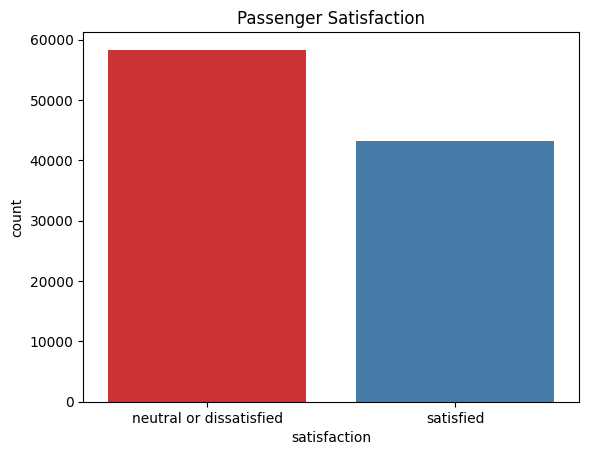

In [6]:
sns.countplot(x='satisfaction', data=df, palette='Set1')
plt.title('Passenger Satisfaction')
plt.show()

**Class vs Satisfaction**

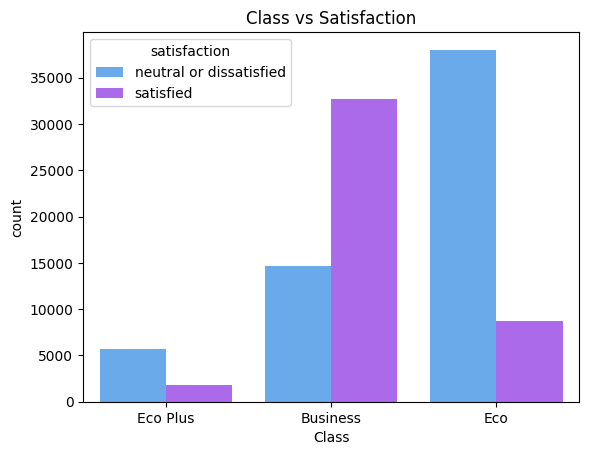

In [7]:
sns.countplot(x='Class', hue='satisfaction', data=df, palette='cool')
plt.title('Class vs Satisfaction')
plt.show()

**Gender vs Satisfaction**

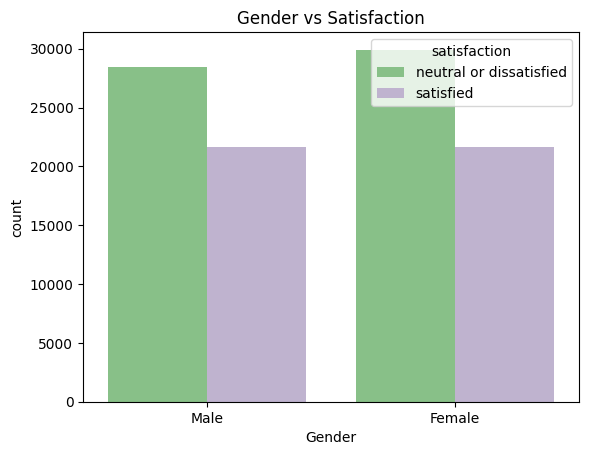

In [8]:
sns.countplot(x='Gender', hue='satisfaction', data=df, palette='Accent')
plt.title('Gender vs Satisfaction')
plt.show()

**Flight Distance**

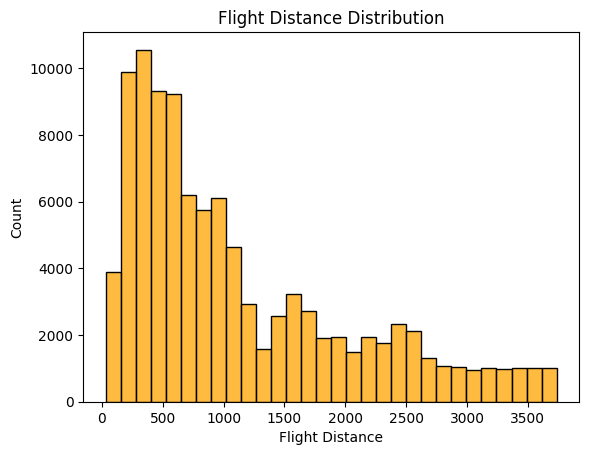

In [9]:
sns.histplot(df['Flight Distance'], bins=30, color='orange')
plt.title('Flight Distance Distribution')
plt.show()

**Customer Type**

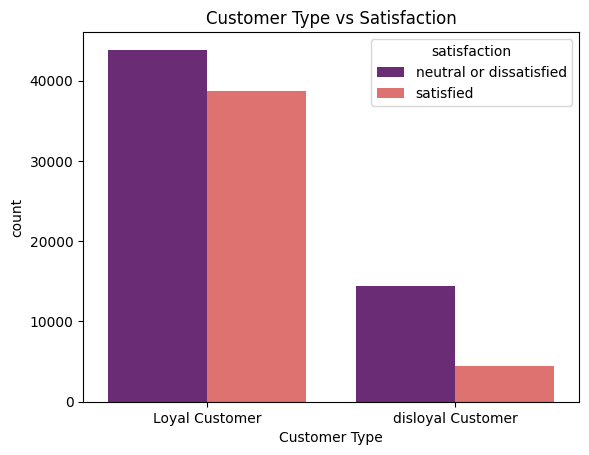

In [10]:
sns.countplot(x='Customer Type', hue='satisfaction', data=df, palette='magma')
plt.title('Customer Type vs Satisfaction')
plt.show()

# **Service Ratings Heatmap**

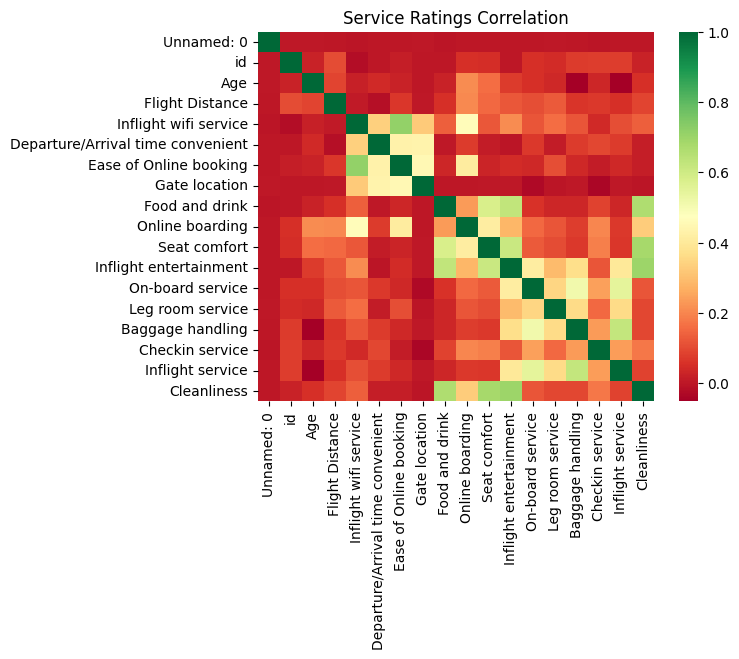

In [11]:
service_cols = df.select_dtypes(include='int64')
sns.heatmap(service_cols.corr(), cmap='RdYlGn')
plt.title('Service Ratings Correlation')
plt.show()

# **CHATBOT (AIRLINE)**

In [15]:
while True:
    q = input("Ask airline question (type 'bye' to exit): ").lower()

    if q == 'bye':
        print("Chatbot closed.")
        break

    elif "how many" in q and "satisfied" in q:
        print(df['satisfaction'].value_counts())

    elif "best class" in q or "highest satisfaction" in q:
        print("Business class has the highest satisfaction.")

    elif "gender" in q:
        print(df.groupby('Gender')['satisfaction'].value_counts())

    elif "customer type" in q or "loyal" in q:
        print(df.groupby('Customer Type')['satisfaction'].value_counts())

    else:
        print("Please ask about satisfaction, class, gender, or customer type.")

Ask airline question (type 'bye' to exit): how many passengers are satisfied
satisfaction
neutral or dissatisfied    58345
satisfied                  43268
Name: count, dtype: int64
Ask airline question (type 'bye' to exit): which class has the highest satisfaction
Business class has the highest satisfaction.
Ask airline question (type 'bye' to exit): gender wise satisfaction
Gender  satisfaction           
Female  neutral or dissatisfied    29917
        satisfied                  21644
Male    neutral or dissatisfied    28428
        satisfied                  21624
Name: count, dtype: int64
Ask airline question (type 'bye' to exit): Are loyal customers more satisfied
Customer Type      satisfaction           
Loyal Customer     neutral or dissatisfied    43866
                   satisfied                  38780
disloyal Customer  neutral or dissatisfied    14479
                   satisfied                   4488
Name: count, dtype: int64
Ask airline question (type 'bye' to exit): b